<a href="https://colab.research.google.com/github/almemanuel/data-science-from-scratch/blob/main/code/statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
num_friends = [100, 4, 41, 40, 25]

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

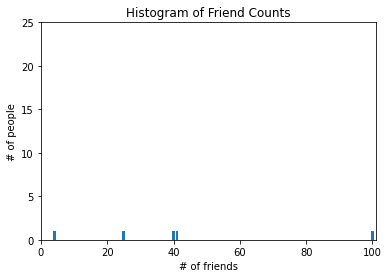

In [5]:
friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)

plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')

plt.show()

In [6]:
num_points =len(num_friends)
num_points

5

In [7]:
largest_value = max(num_friends)
largest_value

100

In [8]:
smallest_value = min(num_friends)
smallest_value

4

In [9]:
sorted_values = sorted(num_friends)
sorted_values

[4, 25, 40, 41, 100]

In [10]:
smallest_value = sorted_values[0]
smallest_value

4

## Central Tendence

In [11]:
from typing import List

def mean(xs:List[float]) -> float:
    return sum(xs) / len(xs)


mean(num_friends)

42.0

In [12]:
def _median_odd(xs:List[float]) -> float:
    return sorted(xs)[len(xs) // 2]


def _median_even(xs:List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2


def median(v:List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [13]:
median(num_friends)

40

In [14]:
def quantile(xs:List[float], p:float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [15]:
def mode(x:List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

## Dispersion

In [16]:
def data_range(xs:List[float]) -> float:
    return max(xs) - min(xs)

In [17]:
from typing import List
Vector = List[float]

def dot(v:Vector, w:Vector) -> float:
    '''
    Calc v_1 * w_1 + ... + v_n * w_n
    '''
    assert len(v) == len(w), 'vector must be same length'
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sum_of_squares(v:Vector) -> float:
    '''
    Return v_1 * v_1 + ... + v_n * v_n
    '''
    return dot(v, v)

In [18]:
import math

def de_mean(xs:List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]


def variance(xs:List[float]) -> float:
    assert len(xs) >= 2, 'variance requires at least two elements'
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / n - 1


def standard_deviation(xs:List[float]) -> float:
    return math.sqrt(variance(xs))

In [19]:
def interquartile_range(xs:List[float]) -> float:
    return quantile(xs, .75) - quantile(xs, .25)

## Correlation

In [21]:
def covariance(xs:List[float], ys:List[float]) -> float:
    assert len(xs) == len(ys), 'xs and ys must have same number of elements'
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [22]:
def correlation(xs:List[float], ys:List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    return 0

Correlation = -1 -> perfect anticorrelation
Correlation = 1 -> perfect correlation

### Simpson's Paradox

Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. This result is often encountered in social-science and medical-science statistics, and is particularly problematic when frequency data are unduly given causal interpretations. The paradox can be resolved when confounding variables and causal relations are appropriately addressed in the statistical modeling. Simpson's paradox has been used to illustrate the kind of misleading results that the misuse of statistics can generate.

### Others Alerts

- A zero correlation denotes that has no linear correlation between two variables, but maybe have is other correlations
- Correlations can be causal